In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/AI_study/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Features
- Pregnacies : 임신 횟수
- Glucose: 혈당 수치
- BloodPressure: 혈압 (mm Hg)
- SkinThickness: 피부 두께 (mm)
- Insulin: 인슐린 수치 (mu U/ml)
- BMI (Body Mass Index): 체질량 지수
- DiabetesPedigreeFunction: 당뇨병 유전력 함수
- Age: 나이
- Outcome: 당뇨병 여부 (0 or 1) - label


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# 데이터 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

C:\Users\yc_hur\AppData\Local\Temp\ipykernel_19992\4103535089.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x="Outcome", palette=["#1f77b4", "#ff7f0e"])


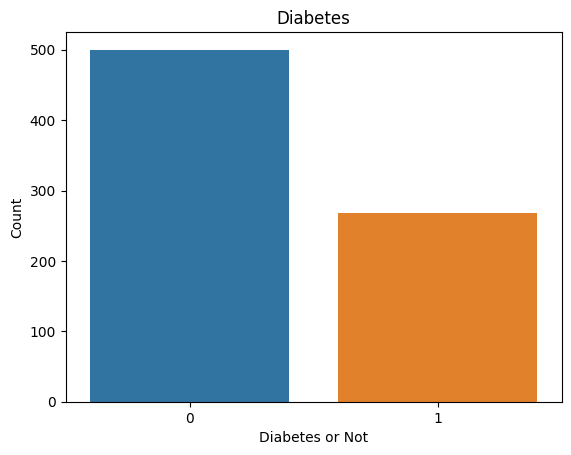

In [7]:
# Outcome 개수 시각화
sns.countplot(data = df, x="Outcome", palette=["#1f77b4", "#ff7f0e"])
plt.xlabel("Diabetes or Not")
plt.ylabel("Count")
plt.title("Diabetes")

plt.show()

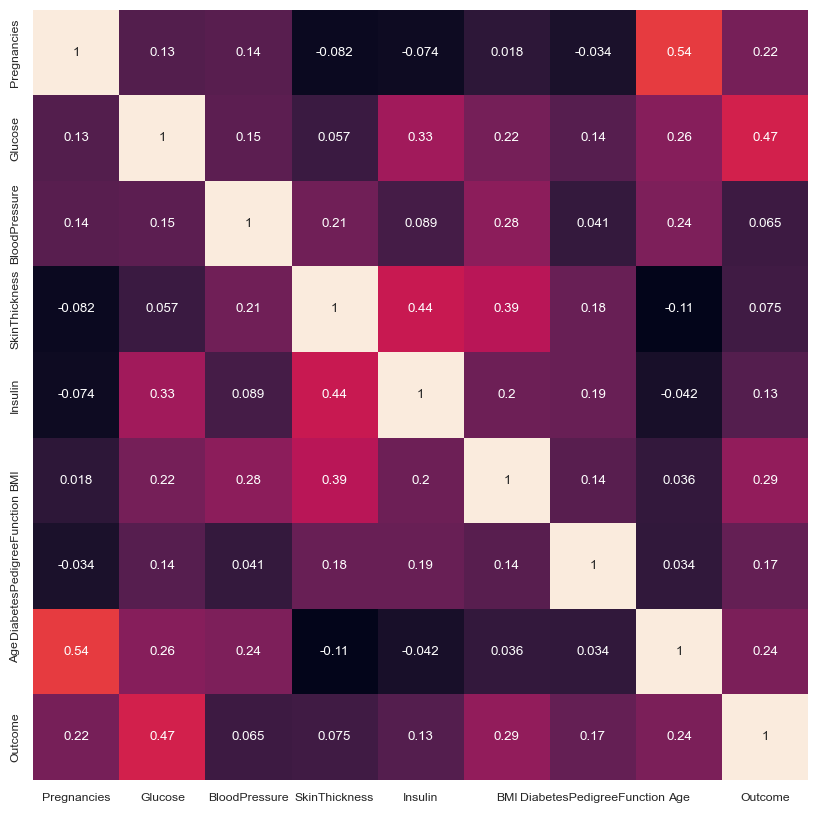

In [8]:
#상관관계 히트맵 생성
#상관 관계 행렬
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

## Class인 Outcome과 높은 상관 관계를 맺는 features
- Pregnancies(0.22)
- Glucose(0.47)
- BMI(0.29)
- Age(0.24)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

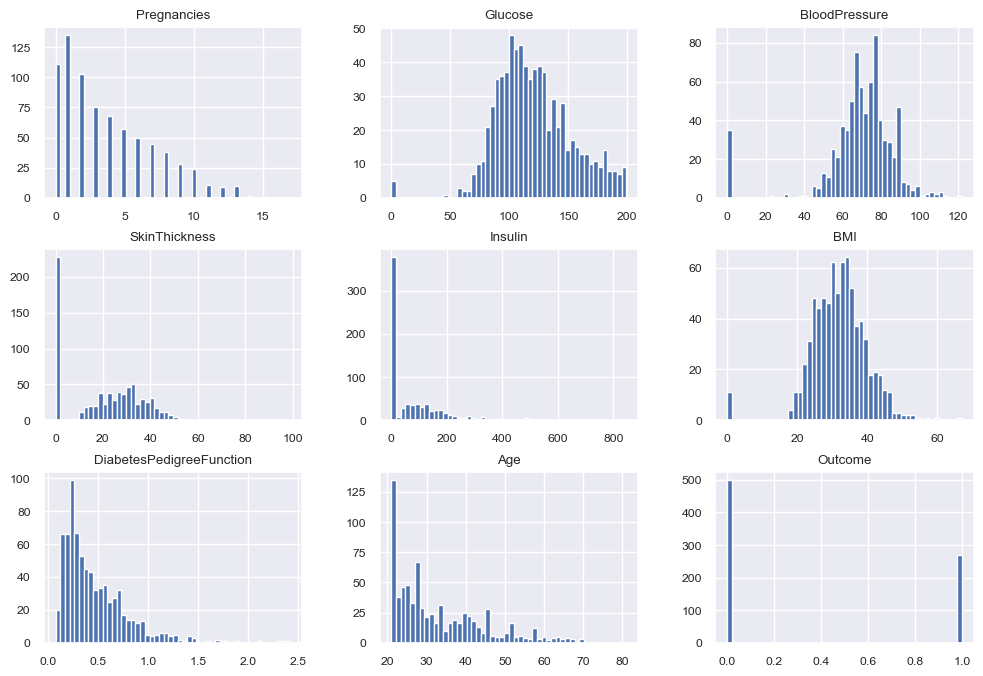

In [9]:
df.hist(bins=50, figsize=(12, 8))

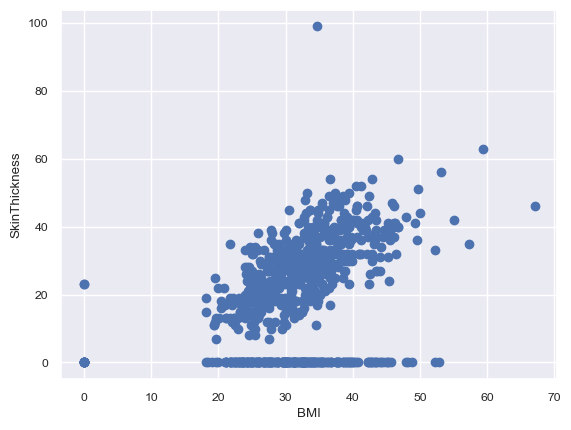

In [10]:
# BMI와 SkinThickness 관계
plt.scatter(df['BMI'], df['SkinThickness'])
plt.xlabel('BMI')
plt.ylabel('SkinThickness')

plt.show()

In [11]:
# 각 열에서 0인 값의 개수를 확인
zero_values_count = (df == 0).sum()

# 결과 출력
print(zero_values_count)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


#### Glucose(혈당 수치), BloodPressure(혈압), SkinThickness(피부 두께), Insulin(인슐린 수치), BMI(체질량 지수)가 0 값이 나오는 것은 이상치로 판단

In [12]:
# 이상치의 개수가 적은 Glucose, BloodPressure, BMI의 경우 이상치 제거
print("제거 전 데이터 개수: ", len(df))
df = df[(df['Glucose'] != 0) & 
        (df['BloodPressure'] != 0) & 
        (df['BMI'] != 0)]
print("제거 후 데이터 개수: ", len(df))

제거 전 데이터 개수:  768
제거 후 데이터 개수:  724


42개의 데이터 제거

Skin Thickness, BMI의 경우 이상치를 가진 데이터가 많고, 이상치를 제외하면 정규 분포를 따르기 때문에 평균값으로 대체

In [13]:
# 평균에 0인 값이 포함되면 평균치가 달라지므로 0인 값을 NaN으로 대체한 후 평균 계산후 대체
# SkinThickness와 Insulin의 0을 NaN으로 변경
df[['SkinThickness', 'Insulin']] = df[['SkinThickness', 'Insulin']].replace(0, np.nan)

# SkinThickness와 Insulin의 NaN 값을 평균값으로 대체
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())

C:\Users\yc_hur\AppData\Local\Temp\ipykernel_19992\71297009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['SkinThickness', 'Insulin']] = df[['SkinThickness', 'Insulin']].replace(0, np.nan)
C:\Users\yc_hur\AppData\Local\Temp\ipykernel_19992\71297009.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
C:\Users\yc_hur\AppData\Local\Temp\ipykernel_19992\71297009.py:7: SettingWithCopyWarning: 
A value is trying to be set on a 

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,29.182331,156.056122,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,9.018907,87.395294,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,118.250000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.182331,156.056122,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,156.056122,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

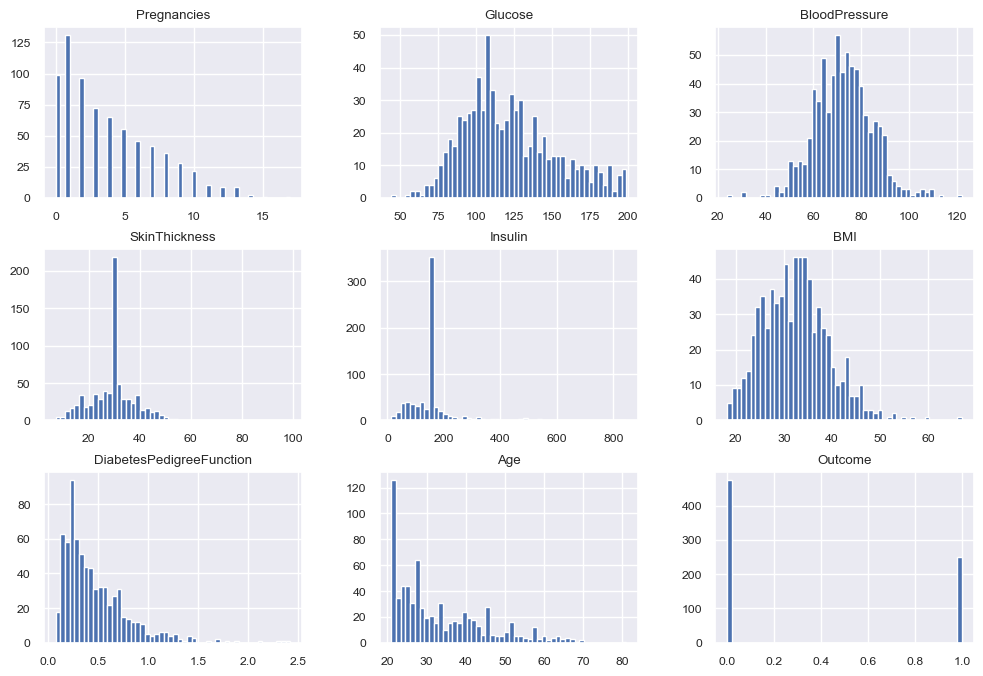

In [15]:
df.hist(bins=50, figsize=(12, 8))

In [16]:
y = df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 724, dtype: int64

In [17]:
X = df.drop('Outcome', axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35.000000,156.056122,33.6,0.627,50
1,1,85,66,29.000000,156.056122,26.6,0.351,31
2,8,183,64,29.182331,156.056122,23.3,0.672,32
3,1,89,66,23.000000,94.000000,28.1,0.167,21
4,0,137,40,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63
764,2,122,70,27.000000,156.056122,36.8,0.340,27
765,5,121,72,23.000000,112.000000,26.2,0.245,30
766,1,126,60,29.182331,156.056122,30.1,0.349,47


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=32)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=32)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((463, 8), (145, 8), (463,), (145,))

In [19]:
# 표준화 StandardScaler 
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
val_scaled = ss.transform(X_val)
test_scaled = ss.transform(X_test)

## DL Model (ANN)
- Outcome은 0과 1로 구성되어 있으므로 따로 One-hot encoding 진행 X
- 2진 분류의 문제이므로 Output은 1개의 뉴런 (출력 값이 1일 확률)
- 마찬가지로 2진 분류이므로 activation 함수는 sigmoid, loss function은 binary_crossentropy 사용

In [20]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(1, activation='sigmoid', input_shape=(8,)))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [21]:
# validation_split = 0.1
batch_size = 16

train_epochs = 50
history = model.fit(train_scaled, y_train, epochs=train_epochs, batch_size=batch_size, validation_data=(val_scaled, y_val), verbose=True, shuffle=True)

Epoch 1/50
29/29 [==============================] - 1s 8ms/step - loss: 0.6640 - accuracy: 0.6307 - val_loss: 0.6398 - val_accuracy: 0.6466
Epoch 2/50
29/29 [==============================] - 0s 4ms/step - loss: 0.6469 - accuracy: 0.6415 - val_loss: 0.6244 - val_accuracy: 0.6552
Epoch 3/50
29/29 [==============================] - 0s 4ms/step - loss: 0.6322 - accuracy: 0.6523 - val_loss: 0.6094 - val_accuracy: 0.6638
Epoch 4/50
29/29 [==============================] - 0s 4ms/step - loss: 0.6188 - accuracy: 0.6717 - val_loss: 0.5961 - val_accuracy: 0.6810
Epoch 5/50
29/29 [==============================] - 0s 4ms/step - loss: 0.6064 - accuracy: 0.6825 - val_loss: 0.5846 - val_accuracy: 0.6983
Epoch 6/50
29/29 [==============================] - 0s 4ms/step - loss: 0.5952 - accuracy: 0.6933 - val_loss: 0.5741 - val_accuracy: 0.6983
Epoch 7/50
29/29 [==============================] - 0s 4ms/step - loss: 0.5846 - accuracy: 0.6955 - val_loss: 0.5652 - val_accuracy: 0.7241
Epoch 8/50
29/29 [==

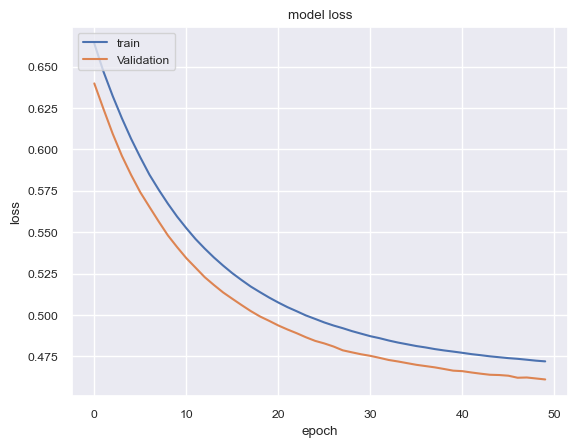

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

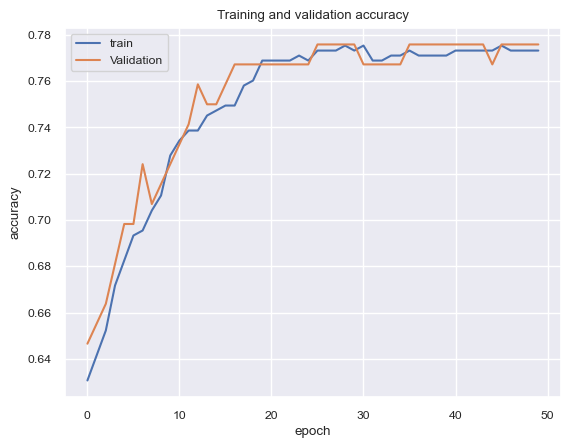

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

이진분류는 label이 1일 '확률'을 구하기 때문에 0.5를 기준으로 0과 1로 변환

5/5 [==============================] - 0s 2ms/step
[[85 10]
 [27 23]]
0.7448275862068966
0.729173565827528
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        95
           1       0.70      0.46      0.55        50

    accuracy                           0.74       145
   macro avg       0.73      0.68      0.69       145
weighted avg       0.74      0.74      0.73       145



<Axes: >

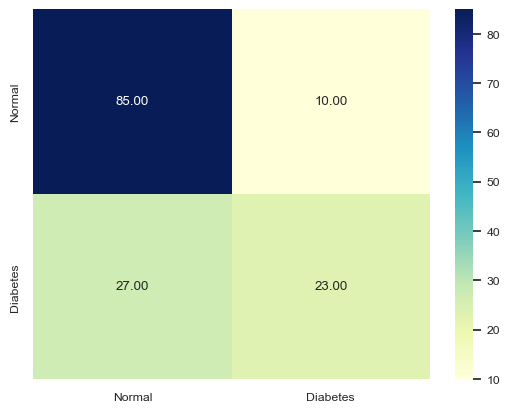

In [24]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

# 모델이 예측한 값 (클래스 1의 확률값)
predy = model.predict(test_scaled)

# 이진 분류 문제에서는 0.5를 기준으로 0과 1로 변환
predy = (predy > 0.5).astype(int)

# Confusion Matrix와 성능 지표 출력
LABELS = ['Normal', 'Diabetes']
cm = confusion_matrix(y_test, predy)
print(cm)
print(accuracy_score(y_test, predy))
print(f1_score(y_test, predy, average='weighted'))
print(classification_report(y_test, predy))

# Confusion Matrix 시각화
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='.2f')

## DL Model(DNN)

In [49]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(8,)))
model.add(Dense(12, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(12, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 8)                 72        
                                                                 
 dense_22 (Dense)            (None, 12)                108       
                                                                 
 dense_23 (Dense)            (None, 16)                208       
                                                                 
 dense_24 (Dense)            (None, 12)                204       
                                                                 
 dense_25 (Dense)            (None, 1)                 13        
                                                                 
Total params: 605
Trainable params: 605
Non-trainable params: 0
_________________________________________________________________


In [50]:
# validation_split = 0.1
batch_size = 64

train_epochs = 50
history = model.fit(train_scaled, y_train, epochs=train_epochs, batch_size=batch_size, validation_data=(val_scaled, y_val), verbose=True, shuffle=True)

Epoch 1/50
8/8 [==============================] - 1s 61ms/step - loss: 0.6979 - accuracy: 0.5097 - val_loss: 0.6801 - val_accuracy: 0.6638
Epoch 2/50
8/8 [==============================] - 0s 10ms/step - loss: 0.6715 - accuracy: 0.6890 - val_loss: 0.6535 - val_accuracy: 0.6897
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6517 - accuracy: 0.7106 - val_loss: 0.6335 - val_accuracy: 0.6897
Epoch 4/50
8/8 [==============================] - 0s 10ms/step - loss: 0.6349 - accuracy: 0.6955 - val_loss: 0.6134 - val_accuracy: 0.6897
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 0.6186 - accuracy: 0.6955 - val_loss: 0.5922 - val_accuracy: 0.7069
Epoch 6/50
8/8 [==============================] - 0s 11ms/step - loss: 0.6002 - accuracy: 0.6998 - val_loss: 0.5692 - val_accuracy: 0.7069
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5815 - accuracy: 0.7084 - val_loss: 0.5451 - val_accuracy: 0.7155
Epoch 8/50
8/8 [==============

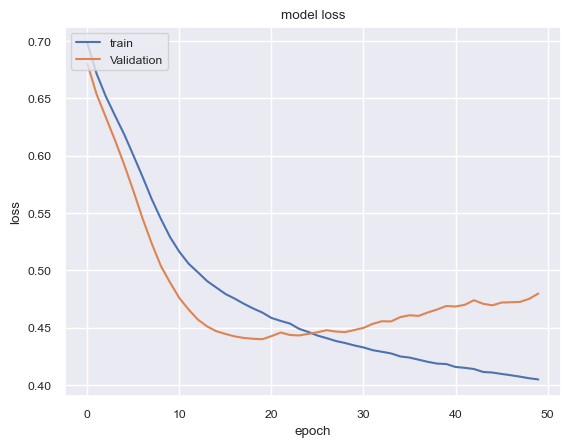

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

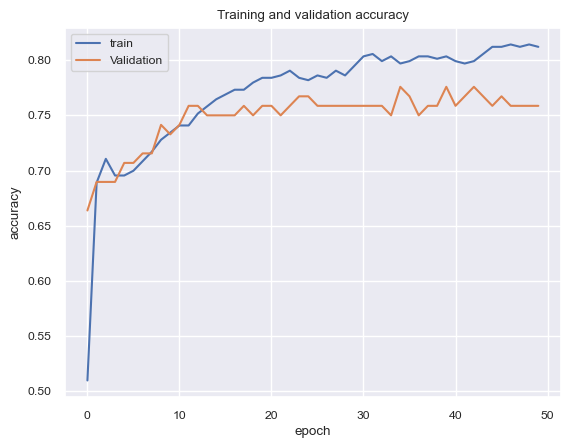

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

5/5 [==============================] - 0s 2ms/step
[[85 10]
 [22 28]]
0.7793103448275862
0.7708184611564605
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        95
           1       0.74      0.56      0.64        50

    accuracy                           0.78       145
   macro avg       0.77      0.73      0.74       145
weighted avg       0.77      0.78      0.77       145



<Axes: >

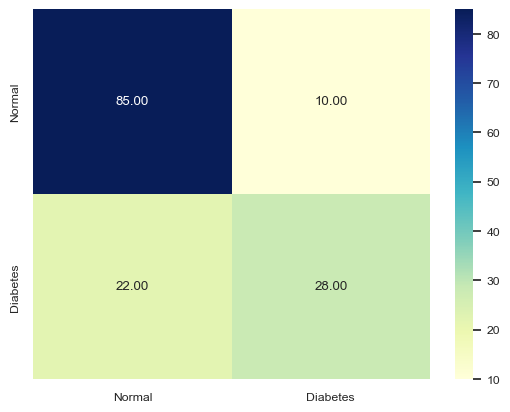

In [53]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

# 모델이 예측한 값 (클래스 1의 확률값)
predy = model.predict(test_scaled)

# 이진 분류 문제에서는 0.5를 기준으로 0과 1로 변환
predy = (predy > 0.5).astype(int)

# Confusion Matrix와 성능 지표 출력
LABELS = ['Normal', 'Diabetes']
cm = confusion_matrix(y_test, predy)
print(cm)
print(accuracy_score(y_test, predy))
print(f1_score(y_test, predy, average='weighted'))
print(classification_report(y_test, predy))

# Confusion Matrix 시각화
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='.2f')

5/5 [==============================] - 0s 1ms/step


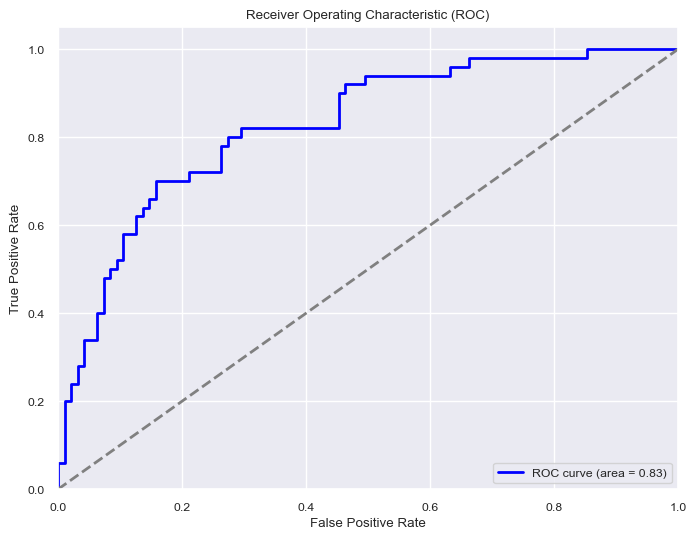

In [54]:
from sklearn.metrics import roc_curve, auc

# 모델의 예측 확률을 사용 (predy는 이진 분류 확률값)
predy_proba = model.predict(test_scaled)

# 실제값과 예측 확률값을 사용하여 ROC 곡선 데이터 계산
fpr, tpr, thresholds = roc_curve(y_test, predy_proba)

# AUC 계산
roc_auc = auc(fpr, tpr)

# ROC 곡선 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')  # 대각선 기준선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()